In [1]:
from sklearn import metrics 
import matplotlib.pyplot as plt
import torch
import pickle
import glob
import sys
from statistics import mean
def load_checkpoint(file_path):
    with open(file_path, 'rb') as f:
        data = torch.load(f)
    return data

/KGAPT_Vol/anaconda3/envs/envmegrapt/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Collecting Results
- Poirot didn't report detailed scores of benign cases, they report only the highest score among all the benign datasets which is 0.16, therefore we used it as the score of all benign cases  


In [2]:
y_true = {} 
score = {}
#cadets
y_true["cadets"] = [1,1,1,1,0,0,0,0]
score["cadets"] = {}
score["cadets"]["megrapt"] = [0.55,0.42,0.57,0.47,0.27,0.36,0,0.25]
#Poirot didn't report detailed scores of benign cases, they report only the highest score among all the benign datasets which is 0.16, therefore we used it as the score of all benign cases  
score["cadets"]["poirot"] = [0.64,0.81,0.89,1,0.16,0.16,0.16,0.16]
score["cadets"]["deephunter"] = [0.511,0.51,0.512,0.513,0.514,0.511,0,0.511] 

#theia
y_true["theia"] = [1,1,0,0]
score["theia"] = {}
score["theia"]["megrapt"] = [0.92,0.59,0,0]
score["theia"]["poirot"] = [0.58,0.71,0.16,0.16]
score["theia"]["deephunter"] = [0.511,0.511,0,0] 

#trace
y_true["trace"] = [1,1,0,0]
score["trace"] = {}
score["trace"]["megrapt"] = [0.43,0.46,0.36,0.36]
#Poirot didn't report detailed scores of benign cases, they report only the highest score among all the benign datasets which is 0.16, therefore we used it as the score of all benign cases  
score["trace"]["poirot"] = [0.54,0.87,0.16,0.16]
score["trace"]["deephunter"] = [0,0.52,0.517,0.52] 


In [23]:
fpr, tpr, threshold = metrics.roc_curve(y_true[dataset], score[dataset][model_name])

In [26]:
dataset

'trace'

Evaluation on cadets dataset
AUC of megrapt is 1.0
AUC of poirot is 1.0
AUC of deephunter is 0.5625


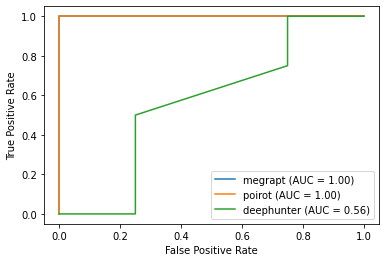

Evaluation on theia dataset
AUC of megrapt is 1.0
AUC of poirot is 1.0
AUC of deephunter is 1.0


<Figure size 432x288 with 0 Axes>

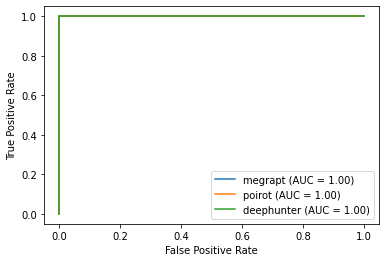

Evaluation on trace dataset
AUC of megrapt is 1.0
AUC of poirot is 1.0
AUC of deephunter is 0.375


<Figure size 432x288 with 0 Axes>

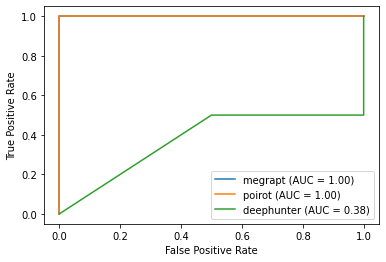

<Figure size 432x288 with 0 Axes>

In [ ]:
for dataset in score.keys():
    print("Evaluation on",dataset,"dataset" )
    fig, ax = plt.subplots()
    for model_name in score[dataset].keys():
        fpr, tpr, thresolds = metrics.roc_curve(y_true[dataset], score[dataset][model_name])
        auc = metrics.auc(fpr, tpr)
        print("AUC of",model_name,"is",auc)
        display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc,estimator_name=model_name)
        display.plot(ax=ax)
        fpr, tpr, auc = 0,0,0 
    plt.show()
    plt.clf()

In [45]:
y_true = {} 
score = {}
#cadets
y_true["cadets"] = [1,1,1,1,0,0,0,0]
score["cadets"] = {}
score["cadets"]["with_ARL"] = [0.55,0.42,0.57,0.47,0.27,0.36,0,0.25]
score["cadets"]["without_ARL"] = [0.46,0.11,0.29,0.60,0.46,0.86,0,0.51]

#theia
y_true["theia"] = [1,1,0,0]
score["theia"] = {}
score["theia"]["with_ARL"] = [0.92,0.59,0,0]
score["theia"]["without_ARL"] = [0.67,0.37,0,0]

#trace
y_true["trace"] = [1,1,0,0]
score["trace"] = {}
score["trace"]["with_ARL"] = [0.43,0.46,0.36,0.36]
score["trace"]["without_ARL"] = [0.62,0.81,0.62,0.68]

#OpTC
y_true["optc"] = [1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0]
score["optc"] = {}
score["optc"]["with_ARL"] = [0.463,0.48,0.407,0,0,0,0.287,0,0,0.295,0,0,0,0,0,0.308]
score["optc"]["without_ARL"] = [0.127,0.198,0.32,0,0,0,0.129,0,0,0.174,0,0,0,0,0,0.104]


Evaluation on cadets dataset
AUC of with_ARL is 1.0
AUC of without_ARL is 0.40625


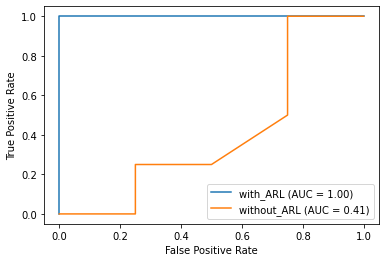

Evaluation on theia dataset
AUC of with_ARL is 1.0
AUC of without_ARL is 1.0


<Figure size 432x288 with 0 Axes>

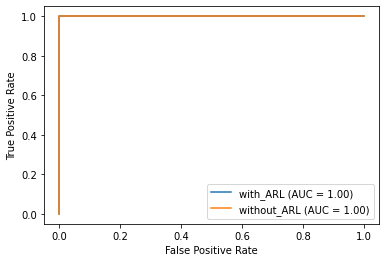

Evaluation on trace dataset
AUC of with_ARL is 1.0
AUC of without_ARL is 0.625


<Figure size 432x288 with 0 Axes>

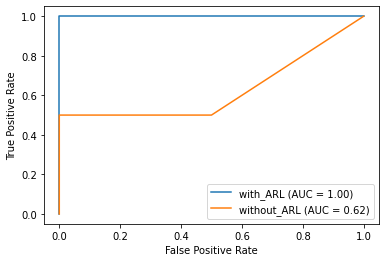

Evaluation on optc dataset
AUC of with_ARL is 0.84375
AUC of without_ARL is 0.8020833333333333


<Figure size 432x288 with 0 Axes>

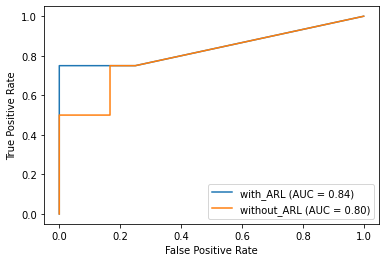

<Figure size 432x288 with 0 Axes>

In [46]:
for dataset in score.keys():
    print("Evaluation on",dataset,"dataset" )
    fig, ax = plt.subplots()
    for model_name in score[dataset].keys():
        fpr, tpr, thresolds = metrics.roc_curve(y_true[dataset], score[dataset][model_name])
        auc = metrics.auc(fpr, tpr)
        print("AUC of",model_name,"is",auc)
        display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc,estimator_name=model_name)
        display.plot(ax=ax)
        fpr, tpr, auc = 0,0,0 
    plt.show()
    plt.clf()